In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
from scipy import stats

In [51]:
tiempo = 'Tiempo de ejecución (en nanosegundos)'
n = 'n'
m = 'm'
p = 'p'
ns = 'ns'
it = 'it'
diff = 'diff'
calidad = 'Diferencia vs solución exacta'

error_rate = 'Porcentaje de error: {0:2.2f}%'

blue='#4C72B0'
green='#55A868'
red='#C44E52'

In [52]:
greedy = pd.read_csv('accuracy-greedy.csv')
greedy = greedy.groupby([n,m,diff]).min().reset_index()
local = pd.read_csv('accuracy-local.csv')
local = local.groupby([n,m,diff]).min().reset_index()
grasp = pd.read_csv('accuracy-grasp.csv')
grasp = grasp.groupby([n,m,it,p,diff]).min().reset_index()

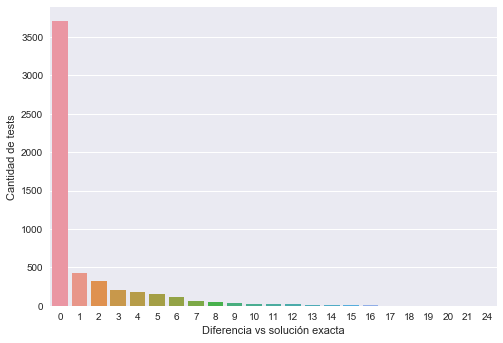

Porcentaje de error: 30.83%


,n,m,diff,ns
max,40.000000,390.000000,24.000000,31079.000000
mean,30.449524,119.549543,1.184736,10122.035641
std,7.789745,92.072989,2.516801,6429.429766


In [53]:
g = sns.countplot(x=diff, data=greedy)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

greedy_count = greedy.groupby([diff])[n].agg(['count']).reset_index()
greedy_sum = greedy_count['count'].agg(['sum']).get(0)

percent = (greedy_sum - greedy_count['count'][0])/greedy_sum
print(error_rate.format(percent*100))

greedy.agg(['max', 'mean', np.std])

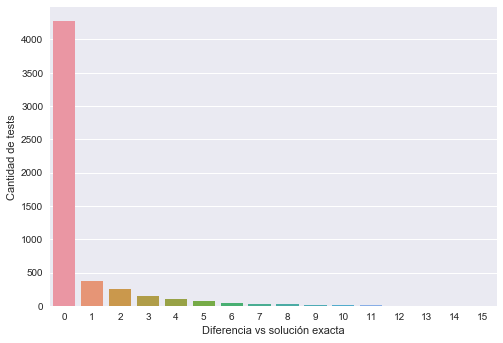

Porcentaje de error: 20.21%


,n,m,diff,ns
max,40.000000,390.000000,15.000000,1.886955e+06
mean,30.449524,119.549543,0.587050,1.890417e+05
std,7.789745,92.072989,1.559755,2.024484e+05


In [54]:
g = sns.countplot(x=diff, data=local)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

local_count = local.groupby([diff])[n].agg(['count']).reset_index()
local_sum = local_count['count'].agg(['sum']).get(0)

percent = (local_sum - local_count['count'][0])/local_sum
print(error_rate.format(percent*100))

local.agg(['max', 'mean', np.std])

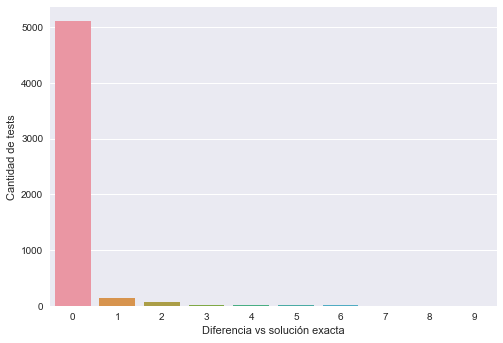

In [55]:
test = grasp[(grasp.p == 0.6) & (grasp.it == 15)]
g = sns.countplot(x=diff, data=test)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

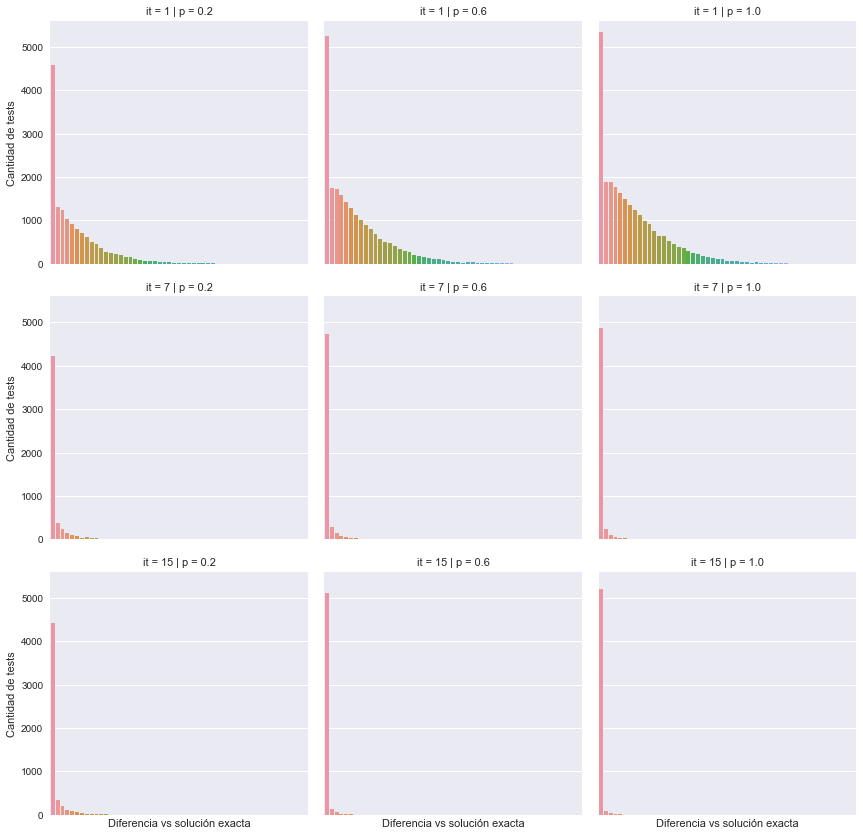

In [56]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

g = sns.factorplot(
    x=diff, data=grasp_test,
    col=p, row=it,
    kind="count"
)

g.set(xticks=[])
g.set_axis_labels(calidad, "Cantidad de tests")
plt.show()

In [72]:
grasp_test = grasp[((grasp.p == 0.2) | (grasp.p == 0.6) | (grasp.p == 1))
                    & ((grasp.it == 1) | (grasp.it == 7) | (grasp.it == 15))]

grasp_test = grasp_test.drop(n,1).drop(m,1)
graspCopy = grasp_test.copy()
graspCopy.columns = [it,p,'dif',ns]

grasp_test = grasp_test.groupby([p,it]).agg(['max', 'mean', np.std]).reset_index()
grasp_test = grasp_test.assign(error=1)

for ps in [0.2,0.6,1]:
    for its in [1,7,15]:
        count, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its)].shape
        errcount, _ = graspCopy[(graspCopy.p == ps) & (graspCopy.it == its) & (graspCopy.dif > 0)].shape
        grasp_test.loc[(grasp_test.p == ps) & (grasp_test.it == its), 'error'] = errcount/count
grasp_test

p  it diff                            ns                              \
            max      mean       std       max          mean           std   
0  0.2   1   48  4.555586  5.657986   3305564  3.184349e+05  3.425217e+05   
1  0.2   7   27  0.696399  1.939022  19667204  2.351098e+06  2.381269e+06   
2  0.2  15   18  0.529763  1.598397  41406710  5.021068e+06  5.101870e+06   
3  0.6   1   59  5.860855  6.488618   3357665  2.819901e+05  2.814712e+05   
4  0.6   7   15  0.306587  1.133105  17384532  2.339655e+06  2.280199e+06   
5  0.6  15    9  0.097220  0.562341  34233385  5.009071e+06  4.885520e+06   
6  1.0   1   60  6.483613  6.788989   2743346  2.602736e+05  2.539519e+05   
7  1.0   7   13  0.227281  0.952313  15183992  2.350323e+06  2.290930e+06   
8  1.0  15    9  0.053555  0.401479  31964890  4.995023e+06  4.836175e+06   

      error  
             
0  0.682532  
1  0.210487  
2  0.174846  
3  0.758986  
4  0.117932  
5  0.047024  
6  0.788830  
7  0.092741  
8  0.027430

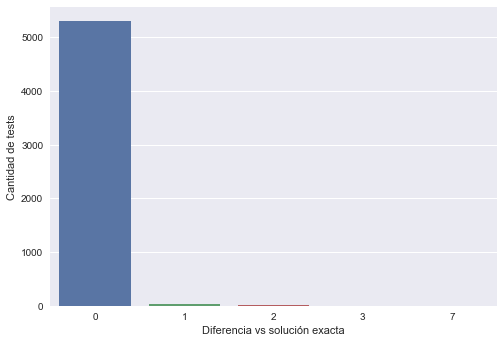

Porcentaje de error: 1.04%
56


,n,m,p,it,diff
max,40.000000,390.000000,0.6,50.0,7.000000
mean,30.449524,119.549543,0.6,50.0,0.016608
std,7.789745,92.072989,0.0,0.0,0.189064


In [73]:
grasp50 = pd.read_csv('accuracy-grasp50.csv')

g = sns.countplot(x=diff, data=grasp50)
g.set_xlabel(calidad)
g.set_ylabel("Cantidad de tests")
plt.show()

grasp_count = grasp50.groupby([diff])[n].agg(['count']).reset_index()
grasp_sum = grasp_count['count'].agg(['sum']).get(0)

percent = (grasp_sum - grasp_count['count'][0])/grasp_sum
print(error_rate.format(percent*100))
print(grasp_sum - grasp_count['count'][0])

grasp50.agg(['max', 'mean', np.std])